In [111]:
# %pip install mlxtend kmodes

In [112]:
from sklearn.datasets import load_wine
import pandas as pd

from mlxtend.frequent_patterns import apriori

In [113]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df = df.sample(frac=1)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,1


In [114]:
for col in data.feature_names:
    df[col] = df[col] > df[col].median()
    
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
142,True,True,True,True,False,False,False,True,False,False,False,False,False,2
53,True,True,True,False,True,True,True,True,True,True,True,True,True,0
144,False,True,False,False,True,False,False,False,False,True,False,False,True,2
86,False,False,False,True,False,False,False,True,True,False,True,False,False,1
64,False,False,True,False,True,False,False,True,False,False,True,False,False,1


In [115]:
target = df['target']
df = df.drop('target', axis=1)

In [116]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

In [117]:
frequent_itemsets

,support,itemsets
0,0.477528,(alcohol)
1,0.500000,(malic_acid)
2,0.483146,(ash)
3,0.466292,(alcalinity_of_ash)
4,0.460674,(magnesium)
5,0.500000,(total_phenols)
6,0.500000,(flavanoids)
7,0.466292,(nonflavanoid_phenols)
8,0.500000,(proanthocyanins)
9,0.500000,(color_intensity)


In [118]:
from itertools import chain, combinations

# Function to get all subsets of a set
def get_subsets(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))


# Generate the new list
new_list = set()
for item in frequent_itemsets['itemsets']:
    if len(item) == 1:
        new_list.add(item)
    else:
        subsets = map(frozenset, get_subsets(item))
        new_list.update(subsets)
        
new_list = list(new_list)
new_list = [list(item) for item in new_list]
new_list

[['malic_acid'],
 ['alcalinity_of_ash'],
 ['proanthocyanins'],
 ['od280/od315_of_diluted_wines'],
 ['flavanoids'],
 ['magnesium'],
 ['hue'],
 ['ash'],
 ['proline'],
 ['nonflavanoid_phenols'],
 ['total_phenols'],
 ['od280/od315_of_diluted_wines', 'flavanoids'],
 ['alcohol'],
 ['color_intensity'],
 ['total_phenols', 'flavanoids']]

In [119]:
univar_list, multivar_list = [], []
for item in new_list:
    if len(item) == 1:
        univar_list.append(item[0])
    else:
        multivar_list.append(item)

univar_list, multivar_list

(['malic_acid',
  'alcalinity_of_ash',
  'proanthocyanins',
  'od280/od315_of_diluted_wines',
  'flavanoids',
  'magnesium',
  'hue',
  'ash',
  'proline',
  'nonflavanoid_phenols',
  'total_phenols',
  'alcohol',
  'color_intensity'],
 [['od280/od315_of_diluted_wines', 'flavanoids'],
  ['total_phenols', 'flavanoids']])

In [120]:
df = df[univar_list]

In [121]:
for item in multivar_list:
    # set it true if all the items in the itemset are true
    df[str(item)] = df[item].all(axis=1)

df.head()

,malic_acid,alcalinity_of_ash,proanthocyanins,od280/od315_of_diluted_wines,flavanoids,magnesium,hue,ash,proline,nonflavanoid_phenols,total_phenols,alcohol,color_intensity,"['od280/od315_of_diluted_wines', 'flavanoids']","['total_phenols', 'flavanoids']"
142,True,True,False,False,False,False,False,True,False,True,False,True,False,False,False
53,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
144,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False
86,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False
64,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False


In [122]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 
# !pip install kmodes 
from kmodes.kmodes import KModes 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Building the model with 3 clusters 
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1) 
clusters = kmode.fit_predict(df) 
# clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26, cost: 576.0
Run 1, iteration: 2/100, moves: 11, cost: 566.0
Run 1, iteration: 3/100, moves: 12, cost: 556.0
Run 1, iteration: 4/100, moves: 4, cost: 556.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 67, cost: 564.0
Run 2, iteration: 2/100, moves: 8, cost: 564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 74, cost: 557.0
Run 3, iteration: 2/100, moves: 9, cost: 557.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 66, cost: 564.0
Run 4, iteration: 2/100, moves: 7, cost: 564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19, cost: 576.0
Best run was number 1


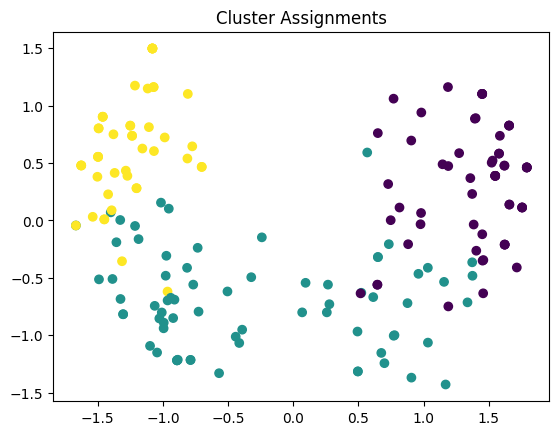

In [123]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (adjust n_components as needed)
pca = PCA(n_components=2)
trans_data_pca = pca.fit_transform(df)
# Plot clusters in 2D
plt.scatter(trans_data_pca[:, 0], trans_data_pca[:, 1], c=target, cmap='viridis')
plt.title('Cluster Assignments')
plt.show()

In [124]:
## mapping the clusters to target variable
# new_clusters = []
# for i in clusters:
#     if i == 0:
#         new_clusters.append(1)
#     elif i == 1:
#         new_clusters.append(0)
#     else:
#         new_clusters.append(2)

In [125]:
(clusters == target.values).sum() / len(target.values)

0.7359550561797753

In [126]:
df.values

array([[ True,  True, False, ..., False, False, False],
       [ True, False,  True, ...,  True,  True,  True],
       [ True, False, False, ...,  True, False, False],
       ...,
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [ True, False,  True, ..., False,  True,  True]])

In [127]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming trans_data_features is your DataFrame
# pca = PCA(n_components=2)
# trans_data_features_pca = pca.fit_transform(trans_data_features)

distance_matrix = pairwise_distances(df.values, metric='jaccard')

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')
dbscan_labels = dbscan.fit_predict(distance_matrix)

# Visualize the clusters in 2D
# plt.scatter(trans_data_features_pca[:, 0], trans_data_features_pca[:, 1], c=dbscan_labels, cmap='viridis')
# plt.title('DBSCAN Clustering Results')
# plt.show()
dbscan_labels, target.values


(array([ 0,  1, -1, -1, -1, -1, -1, -1,  0,  1,  1, -1, -1, -1,  1,  0,  1,
         0,  0, -1,  0,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,  0,  1, -1,
         1,  0,  1,  1,  1,  1, -1, -1,  0,  0, -1, -1,  1, -1, -1,  1, -1,
         1,  0, -1, -1, -1,  0,  0,  1, -1,  1,  1, -1, -1,  1,  1, -1,  0,
         1, -1, -1,  0, -1,  1,  0,  0, -1, -1, -1,  0,  0,  1,  0,  1,  0,
        -1,  0,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  0,  1,  1,  1, -1,
        -1,  1, -1, -1, -1,  1,  1,  0, -1, -1, -1,  1, -1, -1,  1, -1, -1,
        -1, -1,  0, -1,  1, -1,  1, -1,  0, -1, -1,  0,  0,  1, -1,  1,  1,
         0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  1,  0, -1,  0, -1,  1,  1,
        -1,  1, -1, -1,  1,  1,  0,  1, -1, -1, -1,  1, -1, -1,  0, -1,  1,
         1,  1, -1,  1, -1,  1,  1,  1], dtype=int64),
 array([2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0,
        1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
        1, 1, 0, 1, 1, 0, 2, 0, 2, 1,

In [128]:
from sklearn.cluster import AgglomerativeClustering
aggloCluster = AgglomerativeClustering(n_clusters=3)
labels = aggloCluster.fit_predict(df.values)
labels,target.values

(array([2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
        1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
        1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2,
        0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0], dtype=int64),
 array([2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0,
        1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
        1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0,
        0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0,
        0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1,
        1

In [129]:
cluster = []
print(len(labels))
for i in labels:
    if i == 1:
        cluster.append(2)
    if i == 2:
        cluster.append(1)
    if i == 0:
        cluster.append(0)
cluster_freq = [[0,0,0],[0,0,0],[0,0,0]]
for i in range(len(labels)):
    if labels[i] == 0:
        cluster_freq[0][target[i]]+=1
    if labels[i] == 1:
        cluster_freq[1][target[i]]+=1
    if labels[i] == 2:
        cluster_freq[2][target[i]]+=1

print(cluster_freq)


178
[[25, 34, 29], [14, 25, 7], [20, 12, 12]]


In [130]:
(cluster == target.values).sum() / len(target.values)

0.3539325842696629

In [131]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score

print(f"V measure Score: {v_measure_score(cluster,target.values)}")
print(f"Homogeneity Score: {homogeneity_score(cluster,target.values)}")
print(f"Completeness Score: {completeness_score(cluster,target.values)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(cluster,target.values)}")
print(f"Adjusted Mutual Info Score: {adjusted_mutual_info_score(cluster, target.values)}")


V measure Score: 0.6539874962613172
Homogeneity Score: 0.6673412981599316
Completeness Score: 0.6411576412080147
Adjusted Rand Score: 0.5458263741903832
Adjusted Mutual Info Score: 0.650230141839677


In [132]:
df = pd.read_csv("./data/heart/heart.csv")

target_df = df['output']
df = df.drop('output', axis=1)
df = df.sample(frac=1)
for col in df.columns:
    df[col] = df[col] > df[col].median()


In [133]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.498350,(age)
1,0.435644,(trtbps)
2,0.498350,(chol)
3,0.491749,(thalachh)
4,0.462046,(oldpeak)
5,0.468647,(slp)
6,0.422442,(caa)


In [134]:
from itertools import chain, combinations

# Function to get all subsets of a set
def get_subsets(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))


# Generate the new list
new_list = set()
for item in frequent_itemsets['itemsets']:
    if len(item) == 1:
        new_list.add(item)
    else:
        subsets = map(frozenset, get_subsets(item))
        new_list.update(subsets)
        
new_list = list(new_list)
new_list = [list(item) for item in new_list]
new_list

[['slp'], ['trtbps'], ['age'], ['oldpeak'], ['chol'], ['caa'], ['thalachh']]

In [135]:
univar_list, multivar_list = [], []
for item in new_list:
    if len(item) == 1:
        univar_list.append(item[0])
    else:
        multivar_list.append(item)

univar_list, multivar_list

(['slp', 'trtbps', 'age', 'oldpeak', 'chol', 'caa', 'thalachh'], [])

In [136]:
df = df[univar_list]

In [137]:
for item in multivar_list:
    # set it true if all the items in the itemset are true
    df[str(item)] = df[item].all(axis=1)

df

,slp,trtbps,age,oldpeak,chol,caa,thalachh
123,True,False,False,False,True,False,True
251,False,True,False,False,True,True,False
159,True,False,True,False,False,False,True
122,True,False,False,False,True,False,True
27,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
147,True,True,True,True,False,False,True
50,True,False,False,False,True,False,False
175,False,False,False,True,False,False,False
298,False,True,True,False,True,False,False


In [138]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 
# !pip install kmodes 
from kmodes.kmodes import KModes 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Building the model with 3 clusters 
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1) 
clusters = kmode.fit_predict(df) 
# clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 84, cost: 572.0
Run 2, iteration: 2/100, moves: 2, cost: 572.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 109, cost: 700.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 85, cost: 597.0
Run 4, iteration: 2/100, moves: 4, cost: 597.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 76, cost: 572.0
Best run was number 2


In [139]:
clusters, target_df.values

(array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 

In [140]:
## mapping the clusters to target variable
# new_clusters = []
# for i in clusters:
#     if i == 0:
#         new_clusters.append(1)
#     elif i == 1:
#         new_clusters.append(0)
#     else:
#         new_clusters.append(2)

In [141]:
len(clusters), len(target_df.values)

(303, 303)

In [142]:
(clusters == target_df.values).sum() / len(target.values)

0.8258426966292135

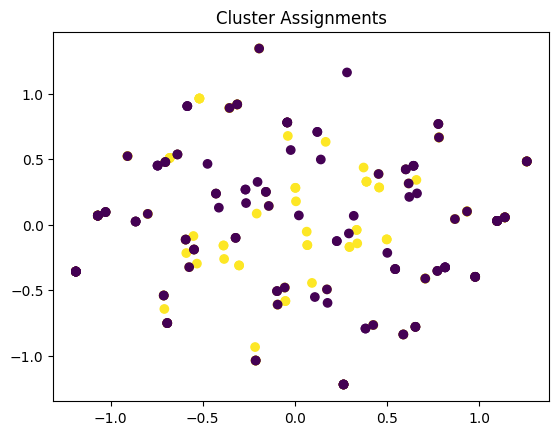

In [143]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (adjust n_components as needed)
pca = PCA(n_components=2)
trans_data_pca = pca.fit_transform(df)
# Plot clusters in 2D
plt.scatter(trans_data_pca[:, 0], trans_data_pca[:, 1], c=target_df, cmap='viridis')
plt.title('Cluster Assignments')
plt.show()

In [144]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming trans_data_features is your DataFrame
# pca = PCA(n_components=2)
# trans_data_features_pca = pca.fit_transform(trans_data_features)

distance_matrix = pairwise_distances(df.values, metric='jaccard')

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')
dbscan_labels = dbscan.fit_predict(distance_matrix)

# Visualize the clusters in 2D
# plt.scatter(trans_data_features_pca[:, 0], trans_data_features_pca[:, 1], c=dbscan_labels, cmap='viridis')
# plt.title('DBSCAN Clustering Results')
# plt.show()
dbscan_labels, target_df.values


(array([ 0, -1, -1,  0,  1,  0,  2,  2,  2,  2,  2,  3, -1,  2,  2,  2,  2,
        -1, -1,  2, -1,  4,  2,  2,  2, -1, -1,  4,  2, -1, -1, -1, -1,  2,
         3,  3, -1, -1, -1,  2, -1, -1,  3,  5,  2, -1,  0, -1, -1, -1, -1,
         2,  1,  2, -1, -1, -1,  2,  0, -1,  2,  2,  2,  2,  4, -1,  2, -1,
         2,  3,  3, -1, -1,  2,  6,  2,  6,  2, -1,  2,  2,  0,  7,  2,  5,
         6,  2,  2,  2,  0,  2, -1,  2,  2, -1, -1,  2, -1,  0,  7,  8, -1,
         2,  2,  2,  2,  2,  2,  1,  2,  7,  0,  2,  5,  2,  2, -1,  2,  2,
        -1, -1,  2,  2,  2,  0,  2,  2,  2,  2,  9, -1,  8,  2, -1,  2,  2,
         0, -1, -1,  2,  2, -1,  2,  3,  2, -1,  3, -1,  2,  2,  2,  2,  2,
         9,  2,  2, -1,  2,  6,  2,  2,  4,  2,  2, -1,  2, -1, -1,  2,  2,
        -1,  2,  2, -1,  8, -1,  2, -1,  2, -1,  2,  3,  2,  9, -1,  2,  2,
         2, -1,  3,  2,  2,  2,  2,  3, -1, -1,  2,  2,  3, -1,  2,  2, -1,
         2,  3,  3, -1,  8,  2, -1,  6,  2, -1,  2, -1,  6, -1,  2,  2, -1,
         2, 

In [145]:
from sklearn.cluster import AgglomerativeClustering
aggloCluster = AgglomerativeClustering(n_clusters=2)
labels = aggloCluster.fit_predict(df.values)
labels,target_df.values

(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 

In [146]:
cluster = []
print(len(labels))
for i in labels:
    if i == 1:
        cluster.append(2)
    if i == 2:
        cluster.append(1)
    if i == 0:
        cluster.append(0)
cluster_freq = [[0,0,0],[0,0,0],[0,0,0]]
for i in range(len(labels)):
    if labels[i] == 0:
        cluster_freq[0][target[i]]+=1
    if labels[i] == 1:
        cluster_freq[1][target[i]]+=1
    if labels[i] == 2:
        cluster_freq[2][target[i]]+=1

print(cluster_freq)


303


KeyError: 178

In [ ]:
(cluster == target_df.values).sum() / len(target.values)

0.39325842696629215

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score

print(f"V measure Score: {v_measure_score(cluster,target_df.values)}")
print(f"Homogeneity Score: {homogeneity_score(cluster,target_df.values)}")
print(f"Completeness Score: {completeness_score(cluster,target_df.values)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(cluster,target_df.values)}")
print(f"Adjusted Mutual Info Score: {adjusted_mutual_info_score(cluster, target_df.values)}")


V measure Score: 7.579685641282572e-05
Homogeneity Score: 7.557979018342769e-05
Completeness Score: 7.601517306804366e-05
Adjusted Rand Score: -0.0031974904806709365
Adjusted Mutual Info Score: -0.0023293522032434215
